<p style="font-family: Arial; font-size:3.75em;color:black; font-style:bold"><br>
Logistic Regression
</p><br>

Reference: https://github.com/leventbass/logistic_regression

조교
- 이정수 (KAIST AI 석사과정): bebeto@kaist.ac.kr
- 이상현 (KAIST AI 박사과정): shlee6825@kaist.ac.kr


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

$\sigma(x) = \frac{1}{1 + e^{(-x)}}$

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

cost= $\frac{1}{m}\Sigma^{m}_{i=1}[y_{i}\log h(x_i) + (1 - y_{i})\log (1-h(x_i))]$

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

Gradient update
<br>
$\theta = \theta - \alpha \frac{\partial J(x)}{\partial \theta}$
<br>
$J(x)= \frac{1}{m}\Sigma^{m}_{i=1}[y_{i}\log h(x_i) + (1 - y_{i})\log (1-h(x_i))]$
<br>
$\frac{\partial J(x)}{\partial \theta_i} = \frac{1}{m}(h(x_i)-y_i)(x_i) $
<br>
gradient descent 식 유도: https://pierceh89.github.io/wiki/logistic-regression/


In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

model의 prediction 값이 0.5 이상이면 1, 0.5 미만이면 0으로 분류 

C:\Users\chahn\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


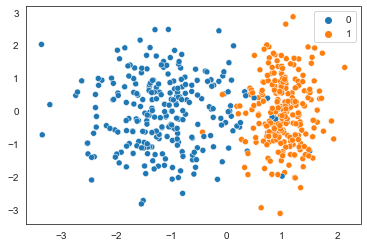

In [8]:
# classification model을 위해 가상의 데이터 생성
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



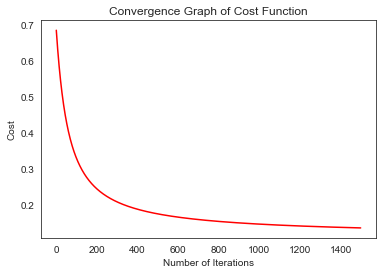

In [9]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [10]:
y_pred = predict(X, params_optimal)
accuracy = float(sum(y_pred == y))/ float(len(y))
print(accuracy)

0.966


In [11]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])
print(intercept, slope)

[13.58165418] [-97.92052089]


C:\Users\chahn\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


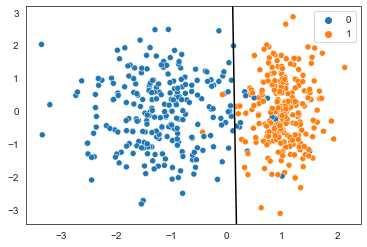

In [12]:
sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");